Question 1:  What is Boosting in Machine Learning? Explain how it improves weak learners.

Boosting is an iterative ensemble machine learning technique that converts multiple simple "weak" learners into a single, powerful "strong" learner by sequentially training models, with each new model correcting the errors of the preceding ones. It improves weak learners by adjusting the weights of training instances, giving more focus and importance to data points that were misclassified by earlier models, thereby refining predictions and learning complex patterns in the data.

Question 2: What is the difference between AdaBoost and Gradient Boosting in terms of how models are trained?

AdaBoost identifies errors by increasing the weights of misclassified data points, making them more influential in subsequent models, while Gradient Boosting addresses errors by training new models to predict the residual errors (the difference between the actual values and the predictions) of the previous models. Both are sequential ensemble methods that combine weak learners, but AdaBoost focuses on instance weighting and Gradient Boosting focuses on residual fitting through gradient descent on the loss function

Question 3: How does regularization help in XGBoost?

Regularization in XGBoost helps prevent overfitting by adding a penalty term to the objective function, which discourages overly complex models. This ensures that the model generalizes better to unseen data, rather than simply memorizing the training data.

Question 4: Why is CatBoost considered efficient for handling categorical data?

CatBoost is considered efficient for handling categorical data primarily due to its native and automated approach to processing these features, eliminating the need for extensive manual preprocessing.
Key reasons for its efficiency:
Native Categorical Feature Handling:
Unlike many other algorithms that require explicit conversion of categorical features into numerical representations (e.g., one-hot encoding, label encoding), CatBoost can directly process categorical features. It automatically applies techniques like Ordered Target Encoding (also known as Ordered Target Statistics) and One-Hot Encoding internally based on the cardinality of the feature.
Ordered Target Encoding:
For high-cardinality categorical features, CatBoost employs Ordered Target Encoding, which calculates target statistics for each category based on a permutation of the data. This "ordered" approach prevents target leakage, a common issue in other target encoding methods where information from the target variable can inadvertently influence the encoding of a feature, leading to overfitting.
Reduced Preprocessing Time:
By automating the handling of categorical features, CatBoost significantly reduces the time and effort typically spent on manual feature engineering and preprocessing, streamlining the machine learning workflow.
Handling High-Cardinality Features:
CatBoost's methods, particularly Ordered Target Encoding, are highly effective in dealing with high-cardinality categorical features (features with a large number of unique categories) where traditional methods like one-hot encoding can lead to a very sparse and high-dimensional feature space, negatively impacting performance and training time.

Question 5: What are some real-world applications where boosting techniques are preferred over bagging methods?

Applications Favoring Boosting (Emphasis on Bias Reduction)
Customer Churn Prediction:
Boosting excels at improving accuracy by iteratively focusing on misclassified instances, making it ideal for predicting customer behavior like churn.
Financial Forecasting:
High accuracy is crucial in financial tasks. Boosting can be used to build models that achieve better predictive power in areas like sales forecasting.
Ad Click Prediction:
Boosting algorithms, such as XGBoost, are often chosen for tasks like predicting whether a user will click on an advertisement due to their ability to improve prediction accuracy by reducing bias.

In [2]:
"""Datasets: ● Use sklearn.datasets.load_breast_cancer() for classification tasks. ● Use sklearn.datasets.fetch_california_housing() for regression tasks.
 Question 6: Write a Python program to: ● Train an AdaBoost Classifier on the Breast Cancer dataset ● Print the model accuracy """

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Load Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split into train & test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize AdaBoost Classifier
model = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"AdaBoost Classifier Accuracy: {accuracy:.4f}")


AdaBoost Classifier Accuracy: 0.9561


In [3]:
'''Question 7:  Write a Python program to: ● Train a Gradient Boosting Regressor on the California Housing dataset ● Evaluate performance using R-squared score '''

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Load California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split into train & test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)

# Train model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# R-squared score
r2 = r2_score(y_test, y_pred)
print(f"Gradient Boosting Regressor R² Score: {r2:.4f}")


Gradient Boosting Regressor R² Score: 0.8004


In [5]:
'''Question 8: Write a Python program to: ● Train an XGBoost Classifier on the Breast Cancer dataset ● Tune the learning rate using GridSearchCV ● Print the best parameters and accuracy '''

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Load Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define XGBoost Classifier (no need for use_label_encoder)
xgb = XGBClassifier(
    n_estimators=100,
    eval_metric="logloss",  # needed for classification
    random_state=42
)

# Parameter grid for learning_rate
param_grid = {
    "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.3]
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

# Fit GridSearch
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best model
best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Classifier Accuracy: {accuracy:.4f}")



Best Parameters: {'learning_rate': 0.1}
XGBoost Classifier Accuracy: 0.9474


CatBoost Classifier Accuracy: 0.9737


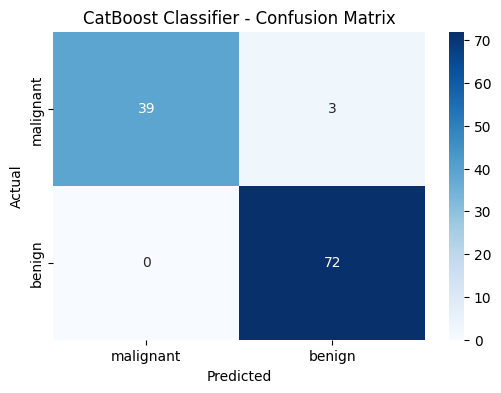

In [8]:
'''Question 9: Write a Python program to: ● Train a CatBoost Classifier ● Plot the confusion matrix using seaborn '''


from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize CatBoost Classifier (silent mode)
model = CatBoostClassifier(iterations=200, learning_rate=0.1, depth=6, verbose=0, random_state=42)

# Train model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"CatBoost Classifier Accuracy: {accuracy:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("CatBoost Classifier - Confusion Matrix")
plt.show()


0:	test: 0.8525905	best: 0.8525905 (0)	total: 39.4ms	remaining: 1m 18s
200:	test: 0.9758487	best: 0.9758720 (199)	total: 4.4s	remaining: 39.4s
400:	test: 0.9790374	best: 0.9790994 (396)	total: 5.69s	remaining: 22.7s
600:	test: 0.9805502	best: 0.9806666 (594)	total: 6.96s	remaining: 16.2s
800:	test: 0.9815821	best: 0.9815976 (788)	total: 8.22s	remaining: 12.3s
1000:	test: 0.9817838	best: 0.9819544 (987)	total: 9.49s	remaining: 9.47s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.9819544439
bestIteration = 987

Shrink model to first 988 iterations.

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       848
           1       0.96      0.88      0.91       152

    accuracy                           0.97      1000
   macro avg       0.97      0.93      0.95      1000
weighted avg       0.97      0.97      0.97      1000



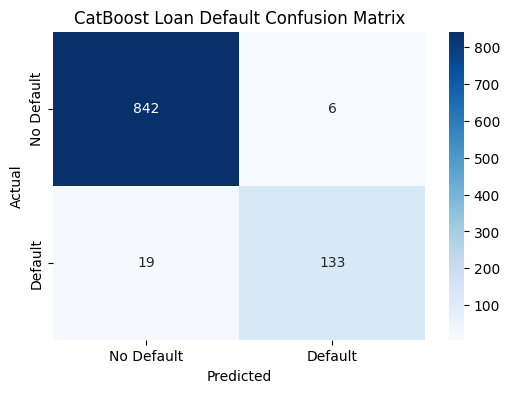

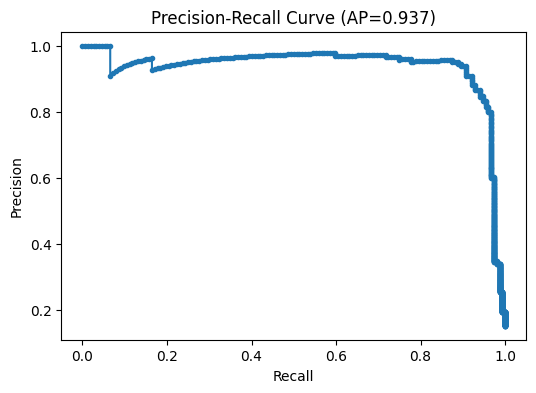

In [10]:
'''Question 10: You're working for a FinTech company trying to predict loan default using customer demographics and transaction behavior.
The dataset is imbalanced, contains missing values, and has both numeric and categorical features.
Describe your step-by-step data science pipeline using boosting techniques:
  ● Data preprocessing & handling missing/categorical values
  ● Choice between AdaBoost, XGBoost, or CatBoost
  ● Hyperparameter tuning strategy
  ● Evaluation metrics you'd choose and why
  ● How the business would benefit from your model '''

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, average_precision_score
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier

# ----------------------------
# 1. Load dataset (example placeholder)
# ----------------------------
# Assume you have a DataFrame 'df' with features and target 'default'
# Replace this with your actual dataset loading
# df = pd.read_csv("loan_data.csv")

# Example synthetic dataset (for demo only)
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=5000, n_features=20, n_informative=12,
                           n_redundant=5, n_classes=2, weights=[0.85, 0.15],
                           random_state=42)

df = pd.DataFrame(X, columns=[f"f{i}" for i in range(X.shape[1])])
df["target"] = y

# ----------------------------
# 2. Train-test split (stratify to preserve imbalance)
# ----------------------------
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ----------------------------
# 3. CatBoost Classifier with imbalance handling
# ----------------------------
# Calculate class weights: weight for positive class = neg/pos ratio
neg, pos = np.bincount(y_train)
class_weights = [1, neg/pos]

model = CatBoostClassifier(
    iterations=2000,
    learning_rate=0.05,
    depth=6,
    eval_metric="AUC",
    class_weights=class_weights,
    random_seed=42,
    verbose=200
)

# ----------------------------
# 4. Train model
# ----------------------------
model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=200)

# ----------------------------
# 5. Predictions & evaluation
# ----------------------------
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Default", "Default"], yticklabels=["No Default", "Default"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("CatBoost Loan Default Confusion Matrix")
plt.show()

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
ap = average_precision_score(y_test, y_proba)

plt.figure(figsize=(6,4))
plt.plot(recall, precision, marker=".")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision-Recall Curve (AP={ap:.3f})")
plt.show()
